# **DATA EXPLORATION**

---

## Objectives

* Explore and visualize data.

## Inputs

This dataset contains information about used motorcycles.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:

1. name
2. selling price
3. year
4. seller type
5. owner
6. km driven
7. ex showroom price 

## Outputs

* Generate plots for visualizing:

1. selling price and kms driven per year
2. identifying outliers
3. how kms driven affect selling price
4. selling price by owner count and year

---

## Import Python Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

## Set and confirm working directory

In [3]:
current_dir = os.getcwd()
current_dir

os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()
current_dir

'/workspace/portfolio-project-5-price-predictor'

# Data Viusualization

---

In [5]:
data = pd.read_csv('data/data.csv')
data['ex_showroom_price'].fillna(value=data['ex_showroom_price'].mean(), inplace=True)

data.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,87958.714058
1,Honda Dio,45000,2017,Individual,1st owner,5650,87958.714058
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.000000
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.000000
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,87958.714058


#### Selling price and KM driven per year ~ Visualization

In [6]:
df = pd.DataFrame(data, columns=['year', 'km_driven', 'selling_price', 'owner'])
df['year'] = df['year'].astype(str)
owner_count = np.array(list(map(lambda x: re.search('[0-9]*', x).group(0), df['owner'].values)))
df['owner'] = owner_count
df.head()

,year,km_driven,selling_price,owner
0,2019,350,175000,1
1,2017,5650,45000,1
2,2018,12000,150000,1
3,2015,23000,65000,1
4,2011,21000,20000,2


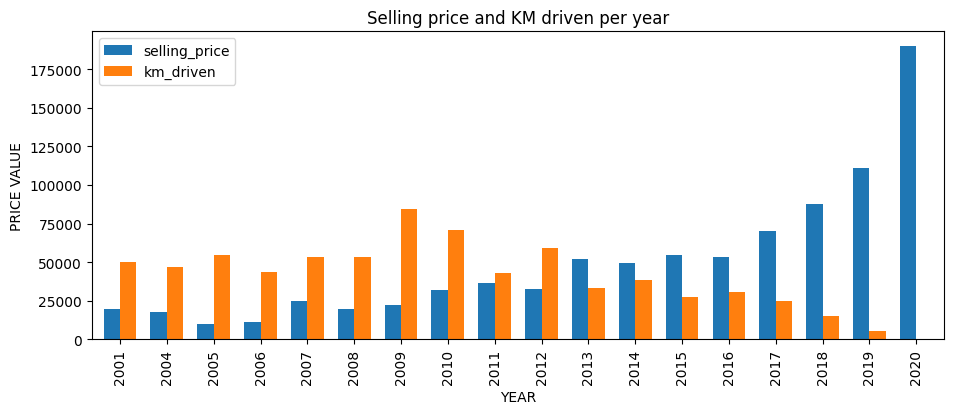

In [5]:
df.groupby('year').mean()[['selling_price', 'km_driven']].plot(kind='bar', width=0.7, figsize=(11,4))
plt.title('Selling price and KM driven per year')
plt.xlabel('YEAR')
plt.ylabel('PRICE VALUE')
plt.show()

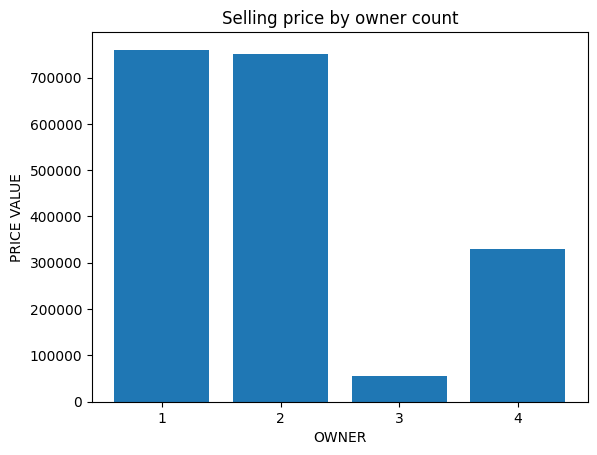

In [6]:
plt.bar(df['owner'], df['selling_price'])
plt.title('Selling price by owner count')
plt.xlabel('OWNER')
plt.ylabel('PRICE VALUE')
plt.show()

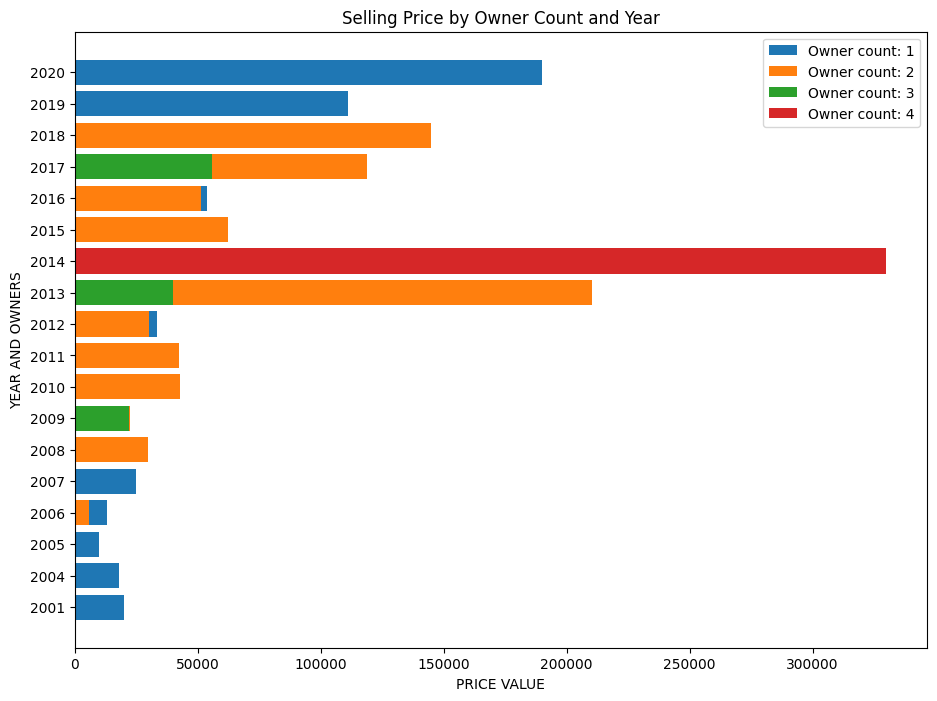

In [7]:
# Create a dictionary to store the selling prices by owner count and year
dict = {}
for i in range(len(df['owner'])):
    key = (df['owner'][i], df['year'][i])
    if key in dict:
        dict[key].append(df['selling_price'][i])
    else:
        dict[key] = [df['selling_price'][i]]

# Sort the keys in the dictionary by owner count and year
sorted_keys = sorted(dict.keys())

# Create a list of lists containing the mean selling price for each owner count and year
mean_selling_prices = []
for key in sorted_keys:
    mean_selling_prices.append([key[0], key[1], sum(dict[key])/len(dict[key])])

# Separate the data into groups by owner count
groups = {}
for item in mean_selling_prices:
    owner_count = item[0]
    if owner_count in groups:
        groups[owner_count].append(item)
    else:
        groups[owner_count] = [item]

# Set figure size
plt.figure(figsize=(11,8))

# Create a bar plot for each owner count
for owner_count in groups:
    dict = groups[owner_count]
    x_values = [str(item[1]) for item in dict]
    y_values = [item[2] for item in dict]
    plt.barh(x_values, y_values, label='Owner count: ' + str(owner_count))

# Set the labels for the axes and the title of the plot
plt.ylabel('YEAR')
plt.xlabel('PRICE VALUE')
plt.title('Selling Price by Owner Count and Year')

plt.legend()

# Display the plot
plt.show()

#### Identifying outliers

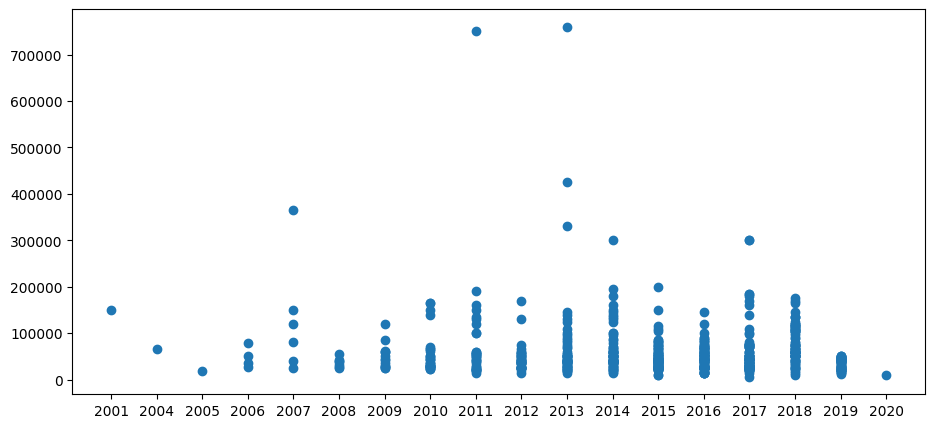

In [8]:
plt.figure(figsize=(11,5))
plt.scatter(df['year'].sort_values().astype(str), df['selling_price'])
plt.show()

#### How KMs driven affect price drop ~ Visualization

In [7]:
df = pd.DataFrame(data, columns=['year', 'km_driven', 'selling_price', 'ex_showroom_price'])

price_difference = data['ex_showroom_price'] - data['selling_price']
df['price_difference'] = price_difference

df.head()

,year,km_driven,selling_price,ex_showroom_price,price_difference
0,2019,350,175000,87958.714058,-87041.285942
1,2017,5650,45000,87958.714058,42958.714058
2,2018,12000,150000,148114.000000,-1886.000000
3,2015,23000,65000,89643.000000,24643.000000
4,2011,21000,20000,87958.714058,67958.714058


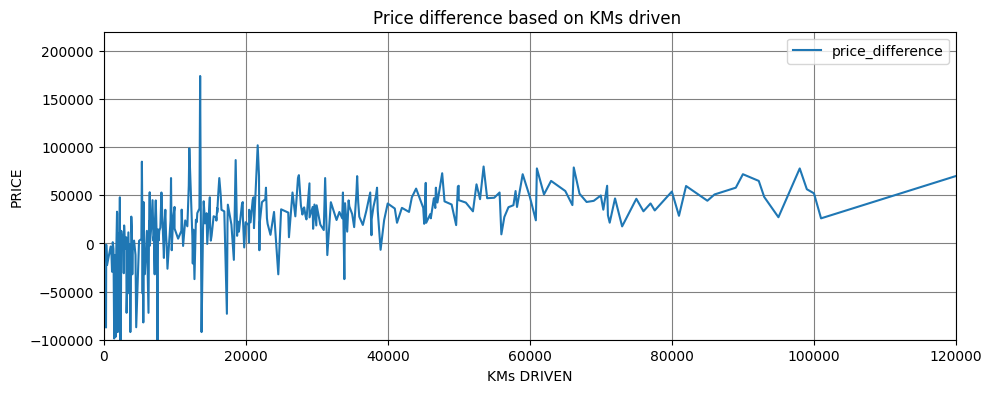

In [9]:
df.groupby('km_driven').mean()[['price_difference']].plot(xlim=(0, 120000), ylim=(-100000, 220000), figsize=(11,4))
plt.grid(color='gray')
plt.title('Price difference based on KMs driven ')
plt.xlabel('KMs DRIVEN')
plt.ylabel('PRICE')
plt.show()